## **Zomato Data Analysis**

###The objective of this project is to analyze The Zomato restaurant dataset to uncover valuable insights within the food delivery market to help restaurant oweners and managers to improve their performance and customer satisfaction.###

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load the data set**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Zomato data .csv')

In [ ]:
#  Checking first 5 records of dataframe
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


- There are total 148 records in dataframe out of which it has 148 rows and 7 columns.
- Dataset has 2 numeric and 5 categorical columns.
- Data set do not have any missing values.

In [ ]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


- Average cost for two people is Rs 418 and max is 950.
- The maximum no. of votes given to a restaurant is 4884 and min is 0.

In [ ]:
df.describe(include='object')

,name,online_order,book_table,rate,listed_in(type)
count,148,148,148,148,148
unique,145,2,2,20,4
top,San Churro Cafe,No,No,3.8/5,Dining
freq,2,90,140,19,110


- Top performing restaurant is San Churro Cafe and it is a dining restaurant.

**Data Cleaning/Preprocessing**

In [ ]:
# Coverting data type for rate
def convert_rate(value):
  value = str(value).split('/')
  value = value[0]
  return float(value)

df['rate'] = df['rate'].apply(convert_rate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [ ]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [ ]:
# checking for missing values
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


#Type of restaurent

Text(0.5, 0, 'Type of restaurent')

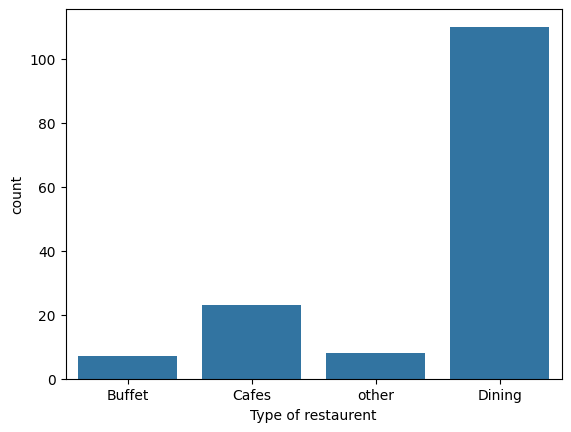

In [ ]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of restaurent")

####Most of the restaurant falls into the dining category.

Text(0, 0.5, 'Votes')

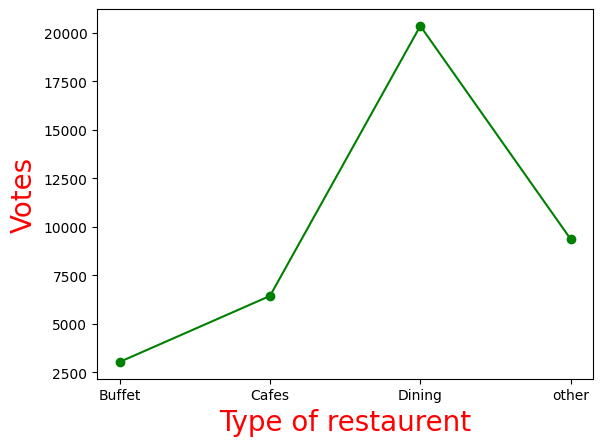

In [ ]:
grouped_df = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_df})
plt.plot(result, c='green', marker='o')
plt.xlabel("Type of restaurent", c='red', size=20)
plt.ylabel('Votes', c='red', size=20)

- Dining restaurants have recieved maximum votes.

In [ ]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


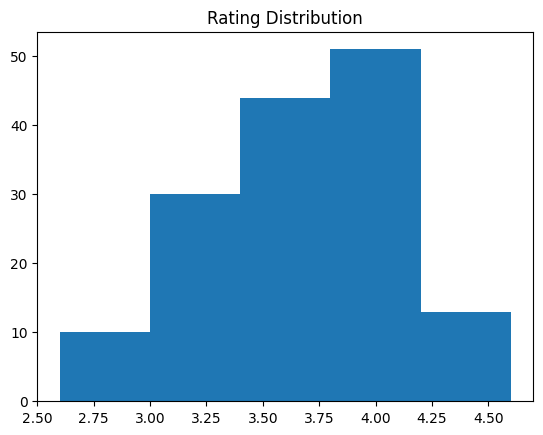

In [ ]:
plt.hist(df['rate'],bins= 5)
plt.title("Rating Distribution")
plt.show()

- Most of the restaurants received ratings between 3.5 to 4.

In [ ]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [ ]:
df['online_order'].value_counts()

,count
online_order,
No,90
Yes,58


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

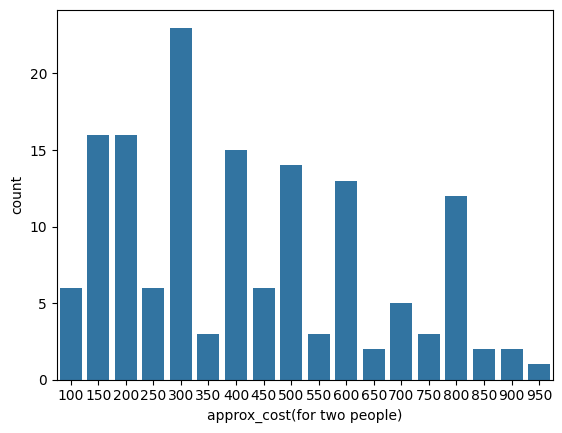

In [ ]:
couple_df = df['approx_cost(for two people)']
sns.countplot(x=couple_df)

- Most of the couples prefer order of at least minimun Rs. 300.

<Axes: xlabel='online_order', ylabel='rate'>

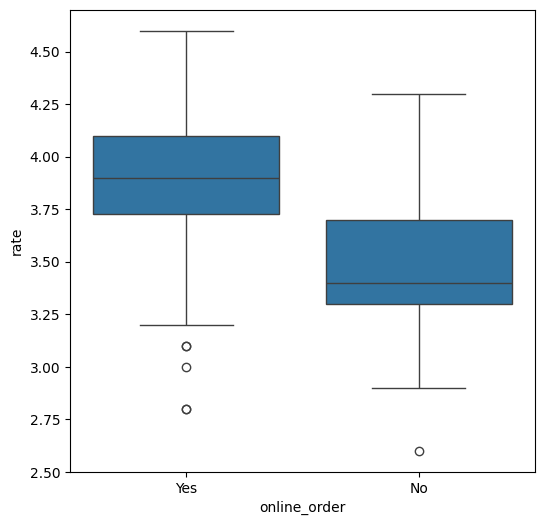

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate', data = df)

- Offline orders received less rating than online orders.

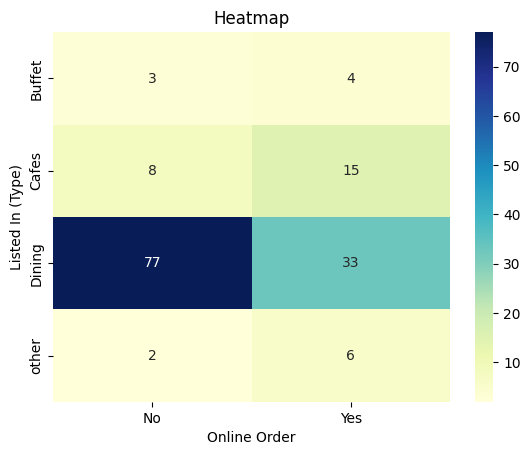

In [ ]:
pivot_table = df.pivot_table(index= 'listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel('Listed In (Type)')
plt.show()

- Dining restaurants primarily accept offline orders, whereas cafes receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.